# l'objectif

l'objective de ce projet est de crier une application en deep learning.

qui permet la prediction de l'age à partir d'une image.

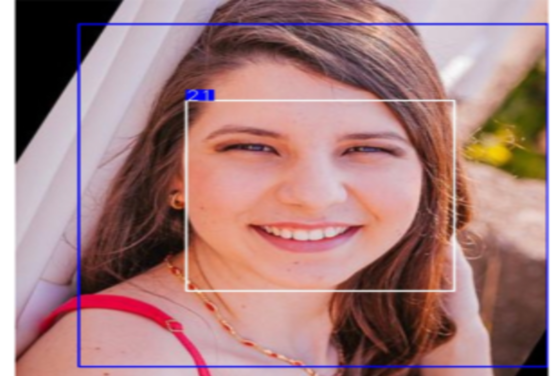

In [99]:
import os 
from pathlib import Path
import numpy as np 
import pandas as pd
import cv2
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications import MobileNet
import tensorflow.keras.layers as L
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm as log_progress
from tensorflow.keras.models import load_model

# Collection des données

In [100]:
image_dir = Path('20-50')
image_dir

WindowsPath('20-50')

# Nettoyage des données

### Crier un fichier DataFrame

In [117]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
print(filepaths)
# print(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])))
ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(str)

df = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

0         20-50\test\20\28492.jpg
1         20-50\test\20\28521.jpg
2         20-50\test\20\28681.jpg
3         20-50\test\20\28801.jpg
4         20-50\test\20\28815.jpg
                   ...           
40435    20-50\train\50\99814.jpg
40436    20-50\train\50\99819.jpg
40437    20-50\train\50\99907.jpg
40438    20-50\train\50\99983.jpg
40439    20-50\train\50\99988.jpg
Name: Filepath, Length: 40440, dtype: object


In [ ]:
ages

In [ ]:
df

In [109]:
#print the unique elements
df["Age"].unique()

array(['33', '30', '40', '32', '22', '38', '39', '31', '48', '24', '41',
       '21', '47', '44', '34', '26', '43', '49', '45', '36', '46', '27',
       '25', '28', '50', '42', '23', '37', '20', '35', '29'], dtype=object)

In [111]:
#select classes 
options = df["Age"].unique()

#select rows that have the classname as either 
train = df[df["Age"].isin(options)].reset_index(drop=True)
train.sort_values("Filepath", axis=0, inplace=True)


# Analyse exploratoire des données

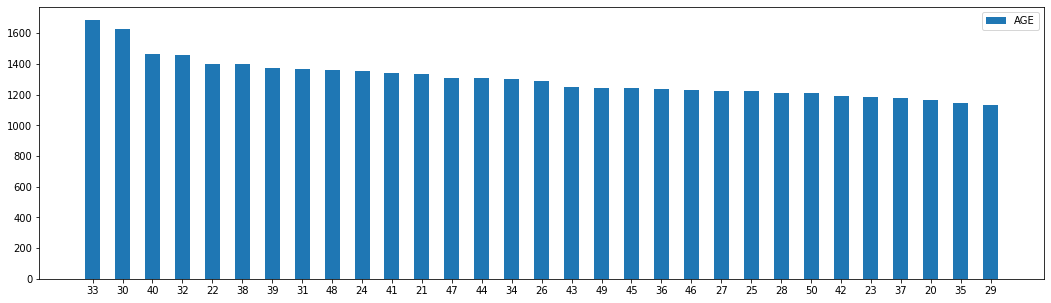

In [112]:
#plotting a bar plot 
f, ax = plt.subplots(figsize=(18,5))
x_axis_val = options
y_axis_val = train.Age.value_counts()
plt.bar(x_axis_val,y_axis_val,width=0.5,label='AGE')
ax.legend()

In [113]:
im = df['Filepath']
def format_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    return img

In [115]:
# labels= images['Age']
labels=np.array([float(age) for age in df['Age']])
labels

array([33., 30., 40., ..., 42., 24., 43.])

In [116]:
data = np.array([format_image(path) for path in im])

KeyboardInterrupt: 

In [ ]:
len(data)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.2)


In [ ]:
len(test_x)


In [ ]:
len(train_x)

In [69]:
train_x

array([[[[ 72,  31,  29],
         [ 81,  44,  40],
         [ 89,  58,  49],
         ...,
         [151, 150, 146],
         [152, 150, 149],
         [155, 153, 152]],

        [[222, 183, 175],
         [129,  94,  84],
         [ 66,  40,  28],
         ...,
         [148, 147, 143],
         [150, 148, 147],
         [153, 151, 150]],

        [[219, 187, 164],
         [246, 219, 198],
         [250, 233, 214],
         ...,
         [146, 145, 141],
         [144, 142, 141],
         [151, 149, 148]],

        ...,

        [[221, 174, 170],
         [222, 175, 171],
         [224, 179, 176],
         ...,
         [216, 157, 107],
         [217, 157, 105],
         [214, 154, 100]],

        [[222, 175, 171],
         [223, 176, 172],
         [225, 180, 177],
         ...,
         [208, 163, 126],
         [196, 150, 109],
         [189, 144, 101]],

        [[221, 174, 170],
         [222, 175, 171],
         [224, 179, 176],
         ...,
         [251, 211, 182],
        

In [59]:
len(train_x) + len(test_x)

40440

In [61]:
len(train_y)

32352

In [68]:
train_y

array([26., 42., 24., ..., 30., 24., 47.])

# Construction du modèle

In [38]:
# inputs = tf.keras.Input(shape=(120, 120, 3))
model = Sequential([
L.Conv2D(filters=16, input_shape=(128,128,3),kernel_size=(3, 3), activation='relu'),
L.MaxPool2D(),
L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
L.MaxPool2D(),
L.GlobalAveragePooling2D(),
L.Dense(64, activation='relu'),
L.Dense(64, activation='relu'),
L.Dense(1, activation='linear'),
])
#                   MobileNet(input_shape=(128,128,3),
#                             include_top=False,
#                             pooling='avg',
#                             weights='imagenet'),
#                             L.Dense(1)

In [39]:
# #next creating a 2D MaxPooling layer
# #adding a max-pooling layer 
# # model.add(L.MaxPooling2D(pool_size=(2,2)))
# #adding an other 2D convolution layer - Output Shape = 10 x 10 x 64
# model.add(L.Conv2D(filters=64,kernel_size=(3,3),use_bias= True, activation="relu"))
# #adding a max-pooling layer - Output Shape = 5 x 5 x 64
# model.add(L.MaxPooling2D(pool_size=(2,2)))
# #flattening the Output from the MaxPooling layer
# #adding a Flatten layer - Output Shape = 5 x 5 x 64
# model.add(L.Flatten())
# #adding a dropout of 2.0 a final dense layer (output layer) with the activation function as softmax
# #adding a dropout 
# model.add(l.Dropout(0.2)) 
# #adding a dense layer with the  softmax activation 
# model.add(L.Dense(2,activation="softmax"))
# #we have succefully implemented the model architecture! let us take a look at the model summary

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                      

In [41]:
model.compile(optimizer='adam',loss='mae',metrics='mae')

### Entrener et tester le modèle

In [42]:
history = model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=100,
    validation_data=(test_x,test_y)
)

Epoch 1/100
506/506 [==============================] - 289s 554ms/step - loss: 9.8045 - mae: 9.8045 - val_loss: 8.9851 - val_mae: 8.9851
Epoch 2/100
506/506 [==============================] - 275s 543ms/step - loss: 9.0367 - mae: 9.0367 - val_loss: 9.5366 - val_mae: 9.5366
Epoch 3/100
506/506 [==============================] - 276s 545ms/step - loss: 8.6166 - mae: 8.6166 - val_loss: 8.1792 - val_mae: 8.1792
Epoch 4/100
506/506 [==============================] - 271s 535ms/step - loss: 8.1571 - mae: 8.1571 - val_loss: 7.8398 - val_mae: 7.8398
Epoch 5/100
506/506 [==============================] - 276s 546ms/step - loss: 7.7169 - mae: 7.7169 - val_loss: 7.6252 - val_mae: 7.6252
Epoch 6/100
506/506 [==============================] - 287s 567ms/step - loss: 7.6629 - mae: 7.6629 - val_loss: 7.6007 - val_mae: 7.6007
Epoch 7/100
506/506 [==============================] - 289s 572ms/step - loss: 7.6412 - mae: 7.6412 - val_loss: 7.5804 - val_mae: 7.5804
Epoch 8/100
506/506 [====================

506/506 [==============================] - 292s 576ms/step - loss: 7.1687 - mae: 7.1687 - val_loss: 7.4011 - val_mae: 7.4011
Epoch 61/100
506/506 [==============================] - 285s 563ms/step - loss: 7.1689 - mae: 7.1689 - val_loss: 7.6605 - val_mae: 7.6605
Epoch 62/100
506/506 [==============================] - 286s 565ms/step - loss: 7.1591 - mae: 7.1591 - val_loss: 7.4126 - val_mae: 7.4126
Epoch 63/100
506/506 [==============================] - 307s 607ms/step - loss: 7.1543 - mae: 7.1543 - val_loss: 7.3443 - val_mae: 7.3443
Epoch 64/100
506/506 [==============================] - 285s 563ms/step - loss: 7.1511 - mae: 7.1511 - val_loss: 7.3131 - val_mae: 7.3131
Epoch 65/100
506/506 [==============================] - 274s 541ms/step - loss: 7.1274 - mae: 7.1274 - val_loss: 7.3389 - val_mae: 7.3389
Epoch 66/100
506/506 [==============================] - 285s 564ms/step - loss: 7.1307 - mae: 7.1307 - val_loss: 7.4087 - val_mae: 7.4087
Epoch 67/100
506/506 [=========================

### Sauvegarde du modèle

In [64]:
model.save('age_prediction_model_ml.h5')

# Evaluation du modèle

In [ ]:
cvscores = []
scores = model.evaluate(test_x, test_y, verbose=0)
print(model.metrics_names)
print("{}: {:.2f}%".format(model.metrics_names[1], scores[0]))
cvscores.append(scores[1] * 100)
print("{:.2f %} (+/- {:.2f})".format(np.mean(cvscores), np.std(cvscores)))

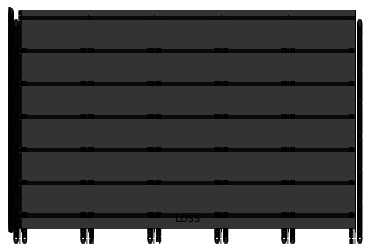

In [97]:
plt.subplots(211)
plt.title('Loss')

# plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss],label='test')
# plt.legend()
plt.show()

In [ ]:
# mode

# Résultat

In [43]:
test_pic = cv2.imread('barack_obama.jpg')
image = cv2.cvtColor(test_pic,cv2.COLOR_BGR2RGB)

In [63]:
test_pic = cv2.resize(image,(128,128))
test_pic

array([[[ 75,  24,  20],
        [ 90,  31,  24],
        [126,  54,  46],
        ...,
        [182,  91,  80],
        [204, 106,  94],
        [216, 112, 103]],

       [[ 74,  23,  19],
        [ 90,  32,  21],
        [123,  54,  46],
        ...,
        [180,  90,  79],
        [204, 106,  97],
        [215, 112, 105]],

       [[ 74,  25,  21],
        [ 88,  31,  22],
        [122,  54,  45],
        ...,
        [181,  92,  79],
        [204, 106,  93],
        [215, 111, 104]],

       ...,

       [[125, 123, 124],
        [126, 124, 125],
        [112, 110, 111],
        ...,
        [ 50,  66,  87],
        [ 58,  70,  93],
        [ 61,  77, 100]],

       [[125, 123, 124],
        [125, 125, 123],
        [117, 114, 116],
        ...,
        [ 47,  59,  81],
        [ 51,  66,  88],
        [ 54,  66,  90]],

       [[126, 126, 124],
        [126, 125, 124],
        [120, 118, 119],
        ...,
        [ 51,  62,  82],
        [ 50,  62,  84],
        [ 53,  65,  87]]

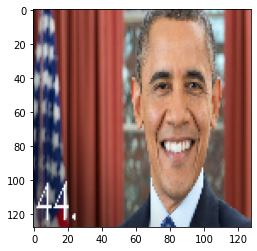

In [45]:
plt.imshow(test_pic)
plt.show()

In [62]:
test_pic = test_pic.reshape((1,128,128,3))
test_pic

array([[[[ 75,  24,  20],
         [ 90,  31,  24],
         [126,  54,  46],
         ...,
         [182,  91,  80],
         [204, 106,  94],
         [216, 112, 103]],

        [[ 74,  23,  19],
         [ 90,  32,  21],
         [123,  54,  46],
         ...,
         [180,  90,  79],
         [204, 106,  97],
         [215, 112, 105]],

        [[ 74,  25,  21],
         [ 88,  31,  22],
         [122,  54,  45],
         ...,
         [181,  92,  79],
         [204, 106,  93],
         [215, 111, 104]],

        ...,

        [[125, 123, 124],
         [126, 124, 125],
         [112, 110, 111],
         ...,
         [ 50,  66,  87],
         [ 58,  70,  93],
         [ 61,  77, 100]],

        [[125, 123, 124],
         [125, 125, 123],
         [117, 114, 116],
         ...,
         [ 47,  59,  81],
         [ 51,  66,  88],
         [ 54,  66,  90]],

        [[126, 126, 124],
         [126, 125, 124],
         [120, 118, 119],
         ...,
         [ 51,  62,  82],
        

In [48]:
pred = model.predict(test_pic)

In [49]:
pred

array([[34.415634]], dtype=float32)

In [65]:
int(pred)

34